# Análisis de datos y estadísticas

#### Importación de módulos a utilziar

In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import time
from collections import Counter

#### Apertura del archivo a procesar

In [2]:
csv = "informacion_partidas.csv"
path = os.path.join(os.getcwd(),'..','csv',csv)

try:
    df=pd.read_csv(path)

except FileNotFoundError:
    print(f"No se encuentra el dataset a procesar {csv}")

#### Top 10 de palabras que se encuentran primero de todas las partidas

In [3]:
partidas=df[df.Evento=='inicio_partida']
rondas_ok=df[df.Estado=='ok']

palabras = pd.merge(partidas[['Timestamp','Id']],rondas_ok[['Timestamp','Id','Respuesta']],on='Id')

# Me quedo con la primer rta correcta de la partida
palabras = palabras.drop_duplicates(subset='Id',keep='first',ignore_index=True) 

# Cálculo del tiempo transcurrido hasta dar la 1er rta correcta (Timestamp_x: tiempo de inicio de partida //Timestamp_y: tiempo al dar la rta)
palabras['Tiempo_transcurrido'] = palabras['Timestamp_y']-palabras['Timestamp_x'] 

# Ordeno por el tiempo calculado
palabras = palabras.sort_values(by='Tiempo_transcurrido') 

# Obtengo las 10 primeras palabras
top_10 = list(palabras['Respuesta'][:10]) 
#top_10=list(zip(palabras['Respuesta'][:10],palabras['Tiempo_transcurrido'][:10])) tambien el tiempo

print('Top 10 de palabras que se encuentran primero de todas las partidas: ',top_10)

Top 10 de palabras que se encuentran primero de todas las partidas:  ['Lago Belgrano', 'Rambo: Last Blood', 'A Taxi Driver', 'Alvin and the Chipmunks Meet Frankenstein', 'Iyaz', 'Sigma', 'Carrie Underwood', 'Kesha', 'Angelique', 'P!nk']


#### Módulo para gráficos de torta

In [4]:
def make_pie_chart(data: pd.Series, labels: list, title:str) -> plt.pie:
    """
    funcion 'make_pie_chart'

    Def:
        Dados ciertos parámetros, devuelve un gráfico de tortas con sus respectivas proporciones, leyendas, porcentajes y título.
    Args:
        data (pd.Series): contiene una Serie a la que se le aplicó el criterio .groupby.size()
        labels (list): es una lista que contiene las claves del parámetro 'data'
        title (str): es una cadena que será el título del gráfico
    """
    plt.pie(data, autopct='%1.1f%%', shadow=True)
    plt.legend(labels)
    plt.title(title)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

#### Módulo para gráficos de barras

In [5]:
def make_bar_chart(valores_x:list,valores_y:list, title,y_label,x_label:str):
    """
    funcion 'make_bar_chart'

    Def:
        Dados ciertos parámetros, devuelve un gráfico de barras con sus respectivas proporciones, leyendas, porcentajes y título.
    Args:
        valores_x(list): son los valores que van en el eje x del gráfico
        valores_y(list): son los valores que van en el eje y del gráfico
        title (str): es una cadena que será el título del gráfico
        y_label(str): es la etiqueta de los valores del eje y 
        x_label(str): es la etiqueta de los valores del eje x
        range(int): valor maximo para el eje y
    """
    
    def agregar_valores(valores:list):
        """
        Def:
            Le agrega al gráfico los valores de las barras
        Args:
            valores(list): lista de los valores
        """
        for i in range(len(valores)):
            #plt.text recibe x,y,s. En la cordenada (x,y) agrega el valor s
            plt.text(i,valores[i],valores[i],ha='center')

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    agregar_valores(valores_y)
    plt.bar(valores_x,valores_y)

#### Gráfico que muestre el porcentaje de partidas por estado.

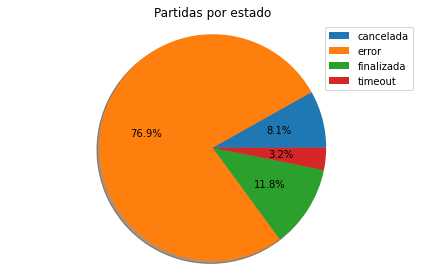

In [6]:
# uso de matplotlib e informacion_partidas.csv//columna[2] "Estado"

#ok, finalizada, error, -, timeout, cancelada, partidas sin evento fin

estado = df[(df["Estado"] != "ok") & (df["Estado"] != "-")]
estado = estado.groupby(["Estado"]).size()
etiquetas = [x for x in estado.keys()]
make_pie_chart(estado, etiquetas, "Partidas por estado")


#### Gráfico que muestre el porcentaje de partidas finalizadas según género

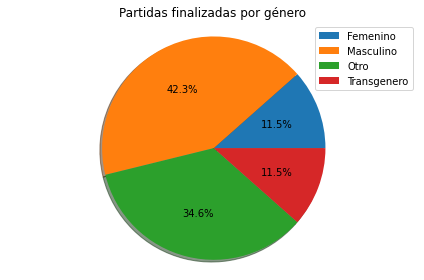

In [7]:
# uso de matplotlib e informacion_partidas.csv//columna[8] "Genero"
#mismo procesamiento que gráfico anterior, cambia columna

genero = df[df["Estado"] == "finalizada"]
genero = genero.groupby(["Genero"]).size()
etiquetas = [x for x in genero.keys()]
make_pie_chart(genero, etiquetas, "Partidas finalizadas por género")

#### Gráfico que muestre el porcentaje de partidas finalizadas según dataset.

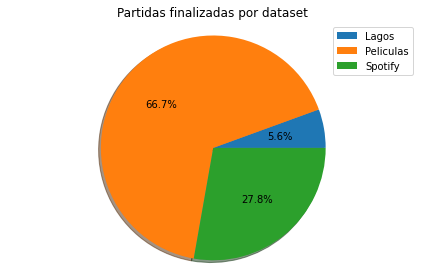

In [8]:
# uso de matplotlib e informacion_partidas.csv//columna[9] "Dataset"

dataset = df[df["Estado"] == "finalizada"]
dataset = dataset.groupby(["Dataset"]).size()
etiquetas = [x for x in dataset.keys()]
make_pie_chart(dataset, etiquetas, "Partidas finalizadas por dataset")

#### Gráfico que muestre el procentaje de partidas finalizadas según nivel

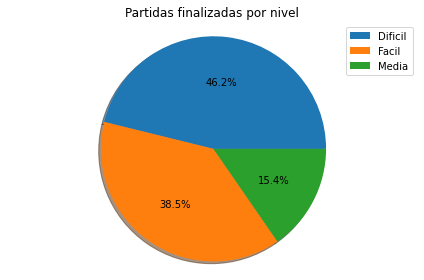

In [9]:
# uso de matplotlib e informacion_partidas.csv//columna[7] "Nivel"
#mismo procesamiento que gráfico anterior, cambia columna

dificultad = df[df["Estado"] == "finalizada"]
dificultad = dificultad.groupby(["Nivel"]).size()
etiquetas = [x for x in dificultad.keys()]
make_pie_chart (dificultad, etiquetas, "Partidas finalizadas por nivel")

#### Duración total de la partida

In [153]:
def duracion_partida(partida):
    return df[df.Id==partida].iloc[-1].Timestamp - df[df.Id==partida].iloc[0].Timestamp

def mensaje_partida(id_partida,duracion):
    return f"La partida con ID '{id_partida}' ha durado {duracion} segundos"

partidas = df.Id.unique()

duraciones_por_partida = list(map(lambda id_partida: mensaje_partida(id_partida,duracion_partida(id_partida)),partidas))

duraciones_por_partida

["La partida con ID 'k8dcl54h-uvzl-98n1-ibkpate8pd4czkzd' ha durado 6 segundos",
 "La partida con ID 'nnrxv3g0-x6sp-8st0-457r2c6qv50avpf5' ha durado 6 segundos",
 "La partida con ID '1uu8c013-wwvp-6kkv-wmv93sgnrm9lwskx' ha durado 74 segundos",
 "La partida con ID 'makh0lgy-6duz-wk48-drwk7ld787gggnwf' ha durado 70 segundos",
 "La partida con ID 'd4r24tyf-22ss-5rgd-dyac2oz2vhs2ipbq' ha durado 90 segundos",
 "La partida con ID 'aswlmrve-taku-2ccr-4y4l91lxzvjuc6sk' ha durado 5 segundos",
 "La partida con ID 't2kzrb3r-kr5f-z94o-nps6vmbw1l7kzcts' ha durado 58 segundos",
 "La partida con ID 'pqn66rye-4a3l-fxfb-datle52bq2nq1sfn' ha durado 19 segundos",
 "La partida con ID '2q3ecnsh-r3nm-tdd3-ris4jd9a298c8x25' ha durado 15 segundos",
 "La partida con ID 'l3o3njbm-i6fu-nomf-7hqc1sh25ilrw8ab' ha durado 2 segundos",
 "La partida con ID 'was5r9gn-wuay-tn0j-h262oig8vm2d40js' ha durado 2 segundos",
 "La partida con ID 'ma92c3lw-kn0s-8793-dbs67lolq8a1q0b6' ha durado 0 segundos",
 "La partida con ID 'y

#### Tiempo de la respuesta exitosa más rápida

In [150]:
def tiempo_de_respuesta(indice):
    return df.loc[indice].Timestamp - df.loc[indice-1].Timestamp

indices_ok = df[df.Estado == 'ok'].index

tiempo_respuestas_ok = list(map(lambda x: tiempo_de_respuesta(x),indices_ok))
print(f"Tiempo de respuesta más rápida: {min(tiempo_respuestas_ok)} segundos")

Tiempo de respuesta más rápida: 0 segundos


#### Promedio de tiempo de respuesta para respuestas exitosas

In [151]:
from functools import reduce

promedio = reduce(lambda a, b: a + b, tiempo_respuestas_ok) / len(tiempo_respuestas_ok)

print (f"El tiempo promedio de respuesta exitosa es: {promedio:.2f}s") 

El tiempo promedio de respuesta exitosa es: 3.89s


#### Promedio de tiempo de partida general

In [155]:
duraciones_partida = list(map(lambda id_partida: duracion_partida(id_partida),partidas))

promedio_general = reduce(lambda a, b: a + b, duraciones_partida) / len(duraciones_partida)

print ("El promedio de tiempo de partida general es de:","{:.2f}".format(promedio_general) ,"segundos")

El promedio de tiempo de partida general es de: 15.42 segundos


#### Porcentaje de aciertos por usuarie

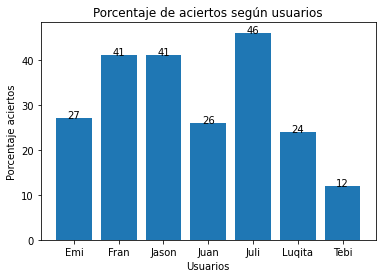

In [14]:
aciertos= df[df["Estado"] == "ok"]
aciertos_usuarios=aciertos.groupby(["Usuarie"]).size()
rta_total=df[(df["Estado"] == "ok")|(df["Estado"] == "error")|(df["Estado"] == "timeout")]
rta_totales_usuarios=rta_total.groupby(["Usuarie"]).size().values

usuarios=aciertos_usuarios.keys()
porcentajes=[int((rta_ok/rta_total)*100) for rta_ok,rta_total in zip(aciertos_usuarios.values,rta_totales_usuarios)]

make_bar_chart(usuarios,porcentajes,'Porcentaje de aciertos según usuarios','Porcentaje aciertos','Usuarios')

#### Cantidad de tarjetas para las que el usuarie no dio respuesta

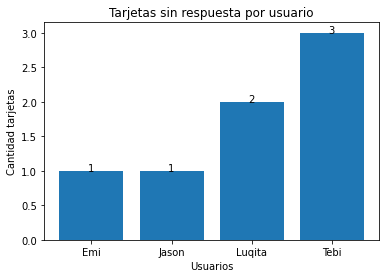

In [15]:
sin_respuesta = df[df["Estado"] == "timeout"]
sin_respuesta=sin_respuesta.groupby(["Usuarie"]).size()

usuarios = [x for x in sin_respuesta.keys()]
sin_respuesta_por_usuarios = [x for x in sin_respuesta.values]
make_bar_chart(usuarios,sin_respuesta_por_usuarios,'Tarjetas sin respuesta por usuario','Cantidad tarjetas','Usuarios')

#### Cantidad de tarjetas en las que el usuarie dio una respuesta errónea

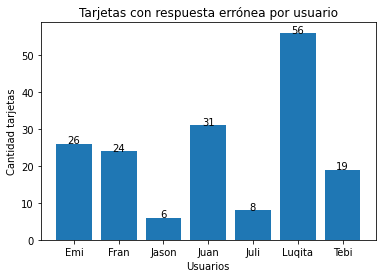

In [16]:
errores = df[df["Estado"] == "error"]
errores = errores.groupby(["Usuarie"]).size()

usuarios = [x for x in errores.keys()]
errores_por_usuario = [x for x in errores.values]
make_bar_chart(usuarios,errores_por_usuario,'Tarjetas con respuesta errónea por usuario','Cantidad tarjetas','Usuarios')

### Opcional

#### Gráfico que muestre el porcentaje de partidas que se juegan para cada dia de la semana

#### Promedio de tiempo de partidas finalizadas por nivel

#### Porcentaje de palabras encontradas en las partidas "timeout"